```
Topic:        Challenge Set 3
Subject:      Explore MTA turnstile data
Date:         10/07/2018
Name:         Goodwin Chen
```

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('2013_movies.csv')

In [18]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [19]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

## Challenge 1

In [36]:
df = df.sort_values(by=['ReleaseDate'])

Text(0,0.5,'Domestic Total Gross (in dollars)')

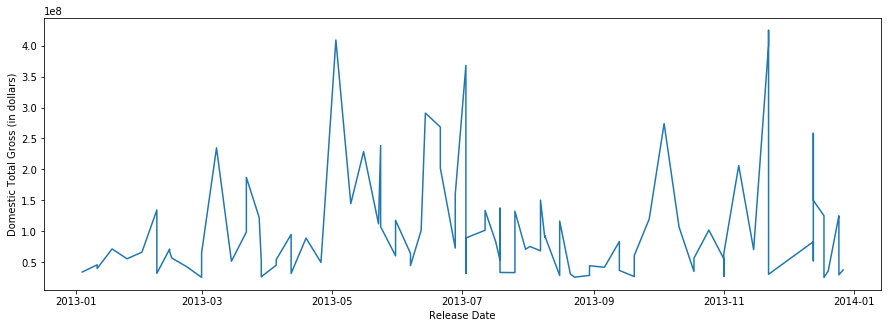

In [37]:
plt.figure(figsize=(15,5))
plt.plot(df.ReleaseDate, df.DomesticTotalGross)
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross (in dollars)')

## Challenge 2

In [40]:
df = df.sort_values(by='DomesticTotalGross')

Text(0,0.5,'Run Time (in minutes)')

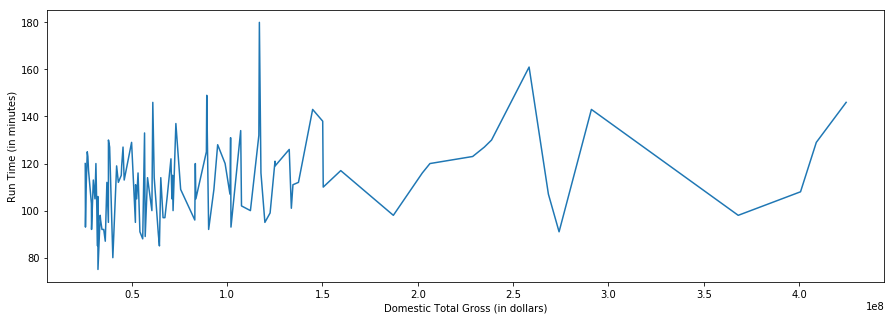

In [41]:
plt.figure(figsize=(15,5))
plt.plot(df.DomesticTotalGross, df.Runtime)
plt.xlabel('Domestic Total Gross (in dollars)')
plt.ylabel('Run Time (in minutes)')

## Challenge 3

In [42]:
(df[['Rating', 'Runtime', 'DomesticTotalGross']]
 .groupby('Rating')
 .mean()
)

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## Challenge 4

In [51]:
df.Rating.value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

In [49]:
df[df.Rating=='G']#.DomesticTotalGross

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21


Text(0.5,1,'R')

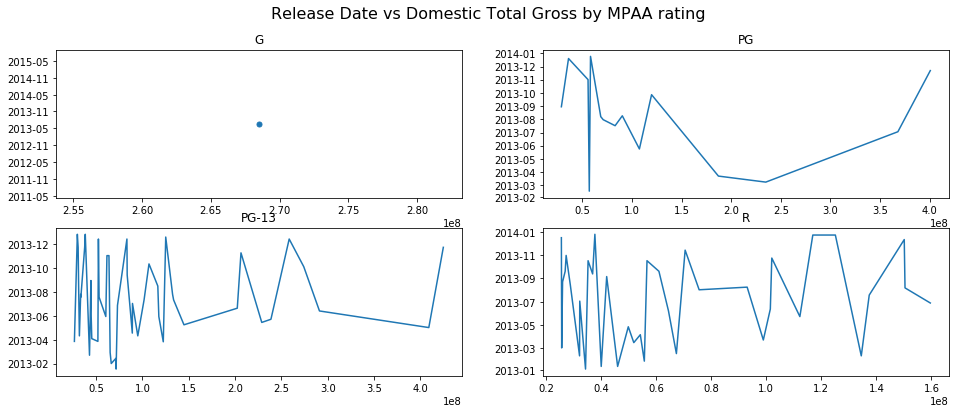

In [60]:
plt.figure(figsize=(16,6))

plt.suptitle('Release Date vs Domestic Total Gross by MPAA rating', fontsize=16)

plt.subplot(2,2,1)
plt.plot(df[df.Rating=='G'].DomesticTotalGross, df[df.Rating=='G'].ReleaseDate,'o', ms=5)
plt.title('G')

plt.subplot(2,2,2)
plt.plot(df[df.Rating=='PG'].DomesticTotalGross, df[df.Rating=='PG'].ReleaseDate)
plt.title('PG')

plt.subplot(2,2,3)
plt.plot(df[df.Rating=='PG-13'].DomesticTotalGross, df[df.Rating=='PG-13'].ReleaseDate)
plt.title('PG-13')

plt.subplot(2,2,4)
plt.plot(df[df.Rating=='R'].DomesticTotalGross, df[df.Rating=='R'].ReleaseDate)
plt.title('R')

## Challenge 5

In [70]:
tmp = (df[['Director', 'DomesticTotalGross', 'Title']]
 .groupby('Director')
 .agg({'DomesticTotalGross': 'sum', 'Title': 'count'})
)
(tmp['DomesticTotalGross'] / tmp['Title']).sort_values(ascending=False).head()

Director
Francis Lawrence             424668047.0
Shane Black                  409013994.0
Chris BuckJennifer Lee       400738009.0
Pierre CoffinChris Renaud    368061265.0
Zack Snyder                  291045518.0
dtype: float64

Francis Lawrence has the highest gross per movie

## Challenge 6

In [73]:
df['month'] = df['ReleaseDate'].apply(lambda x: x.month)

In [104]:
tmp2 = df[['month', 'DomesticTotalGross']].groupby('month').agg(['mean', 'sem'])

Text(0.5,1,'Mean Domestic Total Gross by Month in 2013')

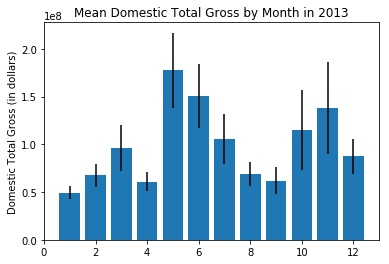

In [108]:
plt.bar(tmp2.index, tmp2.iloc[:, 0], yerr=tmp2.iloc[:,1])
plt.ylabel('Domestic Total Gross (in dollars)')
plt.title('Mean Domestic Total Gross by Month in 2013', fontsize=12)